In [1]:
#most same as Unpol_proposal_pip_lowPt, but I want to try some fit on it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
Factor = 0.3894*1e6/137
def Get_weighted_average(value,error):
    #Factor=2841.438#((1/137)*0.3894*1e6)
    Factor = 0.3894*1e6/137
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return Factor*sum_mean/sum_sigma,Factor*math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
sys = 11
def Get_Sys_table(xl,pTl):
    if xl==0 and pTl==0:
        #Sys=[[12.1/100,9.2/100,11.5/100],[11.8/100,8.8/100,11.2/100],[11.8/100,8.8/100,11.7/100],[11.8/100,9/100,12.9/100]]
        Sys=[[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100]]
        return Sys
        #return 12.5/100
    if xl==0 and pTl==0.2:
        #Sys=[[9.3/100,8.4/100,9.95/100],[8.93/100,7.91/100,9.59/100],[8.93/100,7.91/100,10.02/100],[8.93/100,8.17/100,11.6/100]]
        Sys=[[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100],[sys/100,sys/100,sys/100]]
        return Sys
        #return 12.5/100
    #return 12.5/100
Factor_3xs=math.sqrt(5)
Factor_3xspim=math.sqrt(5)

In [3]:
#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default/CS_default_x1_stat0/CS_default_x1_stat0_pip.dat',delim_whitespace=True)
#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_default_1xs_stat0.dat',delim_whitespace=True)
#df_1xs_zQ2xbjPhT.head()


In [4]:
#df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/2024_morephi/simenhanced_3xs.dat',delim_whitespace=True)#it's actually stat0, this is for pip
#df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/2024_morephi/simenhanced_morephi.dat',delim_whitespace=True)#it's actually stat0, this is for pip
df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/2024_morephi/simenhanced_moremorephi.dat',delim_whitespace=True)#it's actually stat0, this is for pip

df_3xs_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.121509,-3.063346,0.528507,0.323088,1.314384,0.073002,FUUT,0.228099,0.000980,0.0,0.0,neutron,pi+,solid,0.000980
1,1,11.0,0.163536,-3.062964,0.428301,0.323641,1.441689,0.064610,FUUT,0.207195,0.002007,0.0,0.0,neutron,pi+,solid,0.002007
2,2,11.0,0.121702,-2.906122,0.527564,0.322988,1.314354,0.072793,FUUT,0.227450,0.000990,0.0,0.0,neutron,pi+,solid,0.000990
3,3,11.0,0.163702,-2.905970,0.428053,0.323673,1.442212,0.064940,FUUT,0.206280,0.001995,0.0,0.0,neutron,pi+,solid,0.001995
4,4,11.0,0.123047,-2.749299,0.523918,0.323064,1.319171,0.072723,FUUT,0.224628,0.000989,0.0,0.0,neutron,pi+,solid,0.000989


In [5]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[3,3.5,4,4.5,5]
xbj_cuts=[0,0.25]
#xbj_cuts=[0.25,0.5]
PhT_cuts=[0,0.1]
#PhT_cuts=[0.2,0.4]
#PhT_cuts=[0.4,0.6]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI,-0.4*PI,-0.3*PI,-0.2*PI,-0.1*PI,0,0.1*PI,0.2*PI,0.3*PI,0.4*PI,0.5*PI,0.6*PI,0.7*PI,0.8*PI,0.9*PI,PI]
phih_bins =[-PI,-0.95*PI,-0.9*PI,-0.85*PI,-0.8*PI,-0.75*PI,-0.7*PI,-0.65*PI,-0.6*PI,-0.55*PI,-0.5*PI,-0.45*PI,-0.4*PI,-0.35*PI,-0.3*PI,-0.25*PI,-0.2*PI,-0.15*PI,-0.1*PI,-0.05*PI,0,0.05*PI,0.1*PI,0.15*PI,0.2*PI,0.25*PI,0.3*PI,0.35*PI,0.4*PI,0.45*PI,0.5*PI,0.55*PI,0.6*PI,0.65*PI,0.7*PI,0.75*PI,0.8*PI,0.85*PI,0.9*PI,0.9*PI,PI]

#df_1xs_zQ2=df_1xs_zQ2xbjPhT[(df_1xs_zQ2xbjPhT['Ebeam']==11)&(df_1xs_zQ2xbjPhT['x']>xbj_cuts[0])&(df_1xs_zQ2xbjPhT['x']<xbj_cuts[1])&(df_1xs_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_1xs_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_3xs_zQ2=df_3xs_zQ2xbjPhT[(df_3xs_zQ2xbjPhT['Ebeam']==11)&(df_3xs_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_zQ2xbjPhT['x']<xbj_cuts[1])&(df_3xs_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_3xs_zQ2xbjPhT['pT']<PhT_cuts[1])]
#df_3xspim_zQ2=df_3xspim_zQ2xbjPhT[(df_3xspim_zQ2xbjPhT['Ebeam']==11)&(df_3xspim_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xspim_zQ2xbjPhT['x']<xbj_cuts[1])&(df_3xspim_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_3xspim_zQ2xbjPhT['pT']<PhT_cuts[1])]

Sys_table = Get_Sys_table(xbj_cuts[0],PhT_cuts[0])

3.141592653589793


In [6]:
#print(Sys_table)

In [7]:
df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]))
print((df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih'].unique()))

52
[-3.063346 -3.062964 -2.906122 -2.90597  -2.749299 -2.748666 -2.592556
 -2.591354 -2.435594 -2.434209 -2.278883 -2.276634 -2.050253 -2.042531
 -1.738139 -1.72816  -1.494295 -1.337453 -1.180956 -1.024133 -0.867002
 -0.709608 -0.552629 -0.394513 -0.236744 -0.0788    0.078657  0.236899
  0.394555  0.5523    0.709738  0.866827  1.023886  1.18089   1.337682
  1.494227  1.651277  1.807967  1.964835  2.121539  2.278831  2.276867
  2.435914  2.4343    2.59246   2.591702  2.749418  2.748808  2.906133
  2.905859  3.063406  3.063217]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1851084137.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1851084137.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [8]:
df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_2[df_3xs_1_2['Ebeam']==11.0]))
print((df_3xs_1_2[df_3xs_1_2['Ebeam']==11.0]['phih'].unique()))

40
[-2.985524 -2.983959 -2.672935 -2.670367 -2.360431 -2.356059 -2.048297
 -2.041879 -1.735034 -1.728998 -1.494501 -1.337135 -1.180252 -1.023623
 -0.866252 -0.708993 -0.551524 -0.394304 -0.236492 -0.079013  0.079079
  0.23661   0.394162  0.551607  0.709103  0.866268  1.023227  1.180474
  1.336847  1.4939    1.650694  1.8078    1.964761  2.121538  2.278455
  2.435583  2.592439  2.749686  2.906191  3.063077]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/282239502.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/282239502.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/282239502.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [9]:
df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
print(len(df_3xs_1_3[df_3xs_1_3['Ebeam']==11.0]))
print((df_3xs_1_3[df_3xs_1_3['Ebeam']==11.0]['phih'].unique()))

38
[-2.985033 -2.983632 -2.672705 -2.667385 -2.287103 -2.277517 -1.818522
 -1.807161 -1.493834 -1.337103 -1.179947 -1.023056 -0.865917 -0.708279
 -0.55131  -0.394158 -0.236462 -0.078711  0.078536  0.236759  0.394032
  0.55142   0.708734  0.865672  1.023068  1.180077  1.336777  1.493813
  1.650851  1.807542  1.96451   2.12116   2.278295  2.435219  2.592567
  2.749023  2.906147  3.063202]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2080157901.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2080157901.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2080157901.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_1_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[0]][df_3xs_zQ2['Q2']<Q2_cuts[1]]


In [10]:
df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_2_1[df_3xs_2_1['Ebeam']==11.0]))
print((df_3xs_2_1[df_3xs_2_1['Ebeam']==11.0]['phih'].unique()))

80
[-3.062778 -3.062737 -2.906008 -2.905612 -2.749466 -2.748518 -2.592657
 -2.591372 -2.435148 -2.434057 -2.27824  -2.276701 -2.121286 -2.119276
 -1.964386 -1.961909 -1.807618 -1.805555 -1.650436 -1.64828  -1.493366
 -1.491359 -1.336423 -1.334791 -1.179643 -1.177551 -1.02266  -1.02094
 -0.865609 -0.864013 -0.708183 -0.707061 -0.551166 -0.550035 -0.393603
 -0.392901 -0.236313 -0.236114 -0.07844  -0.078634  0.078949  0.078846
  0.23633   0.235763  0.393776  0.39283   0.550883  0.550011  0.708242
  0.707154  0.865742  0.864033  1.022539  1.021406  1.179506  1.178082
  1.336553  1.335081  1.493621  1.491373  1.650417  1.648307  1.807535
  1.804911  1.96446   1.962189  2.12161   2.119488  2.278233  2.276639
  2.435346  2.434092  2.592448  2.590989  2.749386  2.748742  2.906086
  2.905536  3.063241  3.06293 ]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1594653229.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1594653229.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [11]:
df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_2_2[df_3xs_2_2['Ebeam']==11.0]))
print((df_3xs_2_2[df_3xs_2_2['Ebeam']==11.0]['phih'].unique()))

70
[-3.063164 -3.06265  -2.905948 -2.905308 -2.749294 -2.74815  -2.591966
 -2.590823 -2.434836 -2.433347 -2.277867 -2.276072 -2.121346 -2.118918
 -1.964141 -1.961519 -1.807435 -1.804363 -1.650292 -1.647676 -1.492854
 -1.490518 -1.33626  -1.333848 -1.178928 -1.177278 -1.022017 -1.02095
 -0.864675 -0.864088 -0.707851 -0.55064  -0.393004 -0.236252 -0.078604
  0.078855  0.235843  0.39342   0.550489  0.70772   0.864603  0.863938
  1.021804  1.020892  1.178803  1.177521  1.336032  1.334209  1.493274
  1.490784  1.650128  1.647277  1.806955  1.804069  1.963953  1.961356
  2.120964  2.11861   2.278302  2.275988  2.434931  2.433487  2.592002
  2.590716  2.748735  2.74835   2.905997  2.905442  3.06307   3.063145]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/4019256909.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/4019256909.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/4019256909.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [12]:
df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
print(len(df_3xs_2_3[df_3xs_2_3['Ebeam']==11.0]))
print((df_3xs_2_3[df_3xs_2_3['Ebeam']==11.0]['phih'].unique()))

40
[-2.984774 -2.983731 -2.67165  -2.667788 -2.357747 -2.353666 -2.04528
 -2.038377 -1.731542 -1.725081 -1.492742 -1.335662 -1.178353 -1.021604
 -0.864737 -0.707604 -0.550528 -0.393279 -0.236112 -0.078755  0.078461
  0.235994  0.393023  0.550462  0.707642  0.864499  1.021563  1.178661
  1.335563  1.492758  1.649499  1.806633  1.963572  2.120314  2.2776
  2.434999  2.591709  2.74882   2.905836  3.062963]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2461123748.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2461123748.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2461123748.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_2_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[1]][df_3xs_zQ2['Q2']<Q2_cuts[2]]


In [13]:
df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_3_1[df_3xs_3_1['Ebeam']==11.0]))
print((df_3xs_3_1[df_3xs_3_1['Ebeam']==11.0]['phih'].unique()))

66
[-3.063203 -3.063067 -2.905917 -2.905627 -2.749395 -2.748349 -2.592278
 -2.591463 -2.43522  -2.434247 -2.27849  -2.277391 -2.121586 -2.120172
 -1.964565 -1.963321 -1.807271 -1.806662 -1.65034  -1.649493 -1.493302
 -1.492166 -1.336351 -1.335367 -1.17922  -1.178136 -1.022114 -0.865348
 -0.707991 -0.550961 -0.393528 -0.236396 -0.078461  0.078965  0.236423
  0.393882  0.550865  0.708198  0.865452  1.022585  1.179177  1.178264
  1.336565  1.335094  1.493039  1.492328  1.650418  1.649495  1.807538
  1.806543  1.964383  1.963202  2.121301  2.120192  2.278562  2.27736
  2.435345  2.434295  2.592207  2.591818  2.749484  2.748648  2.906064
  2.905805  3.063011  3.063005]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2793984529.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2793984529.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [14]:
df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_3_2[df_3xs_3_2['Ebeam']==11.0]))
print((df_3xs_3_2[df_3xs_3_2['Ebeam']==11.0]['phih'].unique()))

56
[-3.063005 -3.062941 -2.905829 -2.905498 -2.749063 -2.748389 -2.592051
 -2.591181 -2.435044 -2.433881 -2.277772 -2.2769   -2.12088  -2.119713
 -1.964092 -1.962682 -1.731316 -1.727705 -1.493007 -1.336246 -1.179294
 -1.022281 -0.864911 -0.708027 -0.550407 -0.393291 -0.235932 -0.078649
  0.07889   0.236077  0.393348  0.550664  0.707886  0.8652    1.022125
  1.179089  1.336015  1.493011  1.650171  1.807115  1.963873  1.962732
  2.120977  2.119733  2.277999  2.276683  2.435026  2.434006  2.592052
  2.591286  2.748819  2.74819   2.905809  2.905565  3.062995  3.062938]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1431360788.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1431360788.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1431360788.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [15]:
df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
print(len(df_3xs_3_3[df_3xs_3_3['Ebeam']==11.0]))
print((df_3xs_3_3[df_3xs_3_3['Ebeam']==11.0]['phih'].unique()))

40
[-2.985129 -2.984455 -2.671505 -2.668998 -2.357475 -2.354823 -2.044374
 -2.04078  -1.730409 -1.72805  -1.493228 -1.336107 -1.17864  -1.021918
 -0.864557 -0.707938 -0.550242 -0.393195 -0.236103 -0.078813  0.078867
  0.236033  0.393298  0.550265  0.707553  0.864918  1.021702  1.179207
  1.336279  1.493294  1.649863  1.806951  1.96384   2.120708  2.277986
  2.43505   2.591909  2.748941  2.906212  3.063146]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1650800300.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1650800300.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1650800300.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_3_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[2]][df_3xs_zQ2['Q2']<Q2_cuts[3]]


In [16]:
df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_4_1[df_3xs_4_1['Ebeam']==11.0]))
print((df_3xs_4_1[df_3xs_4_1['Ebeam']==11.0]['phih'].unique()))

39
[-2.984168 -2.984062 -2.670665 -2.671053 -2.356724 -2.35655  -2.044277
 -2.042052 -1.731544 -1.493316 -1.337257 -1.180224 -1.023511 -0.866482
 -0.709253 -0.552203 -0.394266 -0.236516 -0.078796  0.078873  0.236622
  0.394273  0.552238  0.709262  0.866695  1.023144  1.180169  1.336956
  1.493445  1.650482  1.806953  1.963856  2.120898  2.278034  2.434945
  2.591654  2.748839  2.90589   3.062744]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1067674914.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1067674914.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_1 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[0]][df_3xs_zQ2['z']<z_cuts[1]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [17]:
df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_4_2[df_3xs_4_2['Ebeam']==11.0]))
print((df_3xs_4_2[df_3xs_4_2['Ebeam']==11.0]['phih'].unique()))

37
[-2.906488 -2.905606 -2.436445 -2.435368 -1.969568 -1.965113 -1.650472
 -1.493383 -1.336415 -1.179691 -1.02305  -0.865714 -0.708733 -0.551605
 -0.394308 -0.236464 -0.078836  0.078756  0.236548  0.394078  0.551407
  0.708629  0.865622  1.023016  1.179774  1.336379  1.493402  1.650104
  1.806862  1.964203  2.121264  2.278165  2.435097  2.592056  2.749103
  2.906111  3.063165]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/691365294.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/691365294.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/691365294.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_2 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[1]][df_3xs_zQ2['z']<z_cuts[2]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


In [18]:
df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
print(len(df_3xs_4_3[df_3xs_4_3['Ebeam']==11.0]))
print((df_3xs_4_3[df_3xs_4_3['Ebeam']==11.0]['phih'].unique()))

34
[-2.828926 -2.828434 -2.205112 -1.731122 -1.493309 -1.336496 -1.17962
 -1.022523 -0.865422 -0.708301 -0.551232 -0.393879 -0.236243 -0.078591
  0.07861   0.236923  0.394005  0.551105  0.708413  0.86518   1.022387
  1.179431  1.336397  1.493349  1.650238  1.807278  1.96413   2.121106
  2.278308  2.434879  2.591957  2.748815  2.905858  3.062572]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/408803260.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/408803260.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/408803260.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3xs_4_3 = df_3xs_zQ2[df_3xs_zQ2['z']>z_cuts[2]][df_3xs_zQ2['z']<z_cuts[3]][df_3xs_zQ2['Q2']>Q2_cuts[3]][df_3xs_zQ2['Q2']<Q2_cuts[4]]


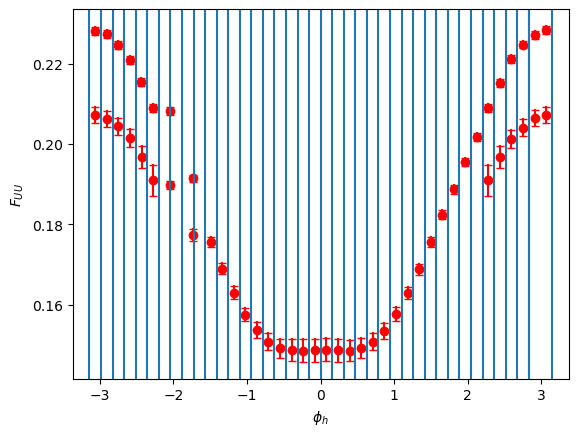

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1 = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['phih']
Fuu_1_1 = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0]['value']
for i_phih_1_1 in phih_1_1:
    Fuu_value = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['value']
    Fuu_stat = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['stat']
    #Fuu_1_1_sys.append(df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0][df_3xs_1_1['phih']==i_phih_1_1]['systabs'])
    ax.plot([i_phih_1_1,i_phih_1_1],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='red',marker='_')
plt.plot(phih_1_1,Fuu_1_1,'ro',label='Eb=11GeV')
phih_1_1_sorted = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['phih']
Fuu_1_1_sys = df_3xs_1_1[df_3xs_1_1['Ebeam']==11.0].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

#phih_1_1_Eb2 = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8]['phih']
#Fuu_1_1_Eb2 = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8]['value']
#for i_phih_1_1_Eb2 in phih_1_1_Eb2:
#    Fuu_value = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8][df_3xs_1_1['phih']==i_phih_1_1_Eb2]['value']
#    Fuu_stat = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8][df_3xs_1_1['phih']==i_phih_1_1_Eb2]['stat']
#    ax.plot([i_phih_1_1_Eb2,i_phih_1_1_Eb2],[Fuu_value-Fuu_stat,Fuu_value+Fuu_stat],color='red',marker='_')
#plt.plot(phih_1_1_Eb2,Fuu_1_1_Eb2,'ro',label='Eb=8.8GeV')
#phih_1_1_Eb2_sorted = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['phih']
#Fuu_1_1_Eb2_sys = df_3xs_1_1[df_3xs_1_1['Ebeam']==8.8].sort_values(by=['phih'])['error']
#ax.fill_between(phih_1_1_Eb2_sorted,np.asarray(0.01)-np.asarray(Fuu_1_1_Eb2_sys),np.asarray(0.01)+np.asarray(Fuu_1_1_Eb2_sys),color='blue',alpha=0.25,linewidth=0,label='sys err')

plt.xlabel('$\phi_h$')
plt.ylabel('$F_{UU}$')
#plt.ylim(0.01,0.2)
#plt.yscale('log')
for i_phih in phih_bins:
    plt.axvline(x=i_phih)
#plt.savefig('../Unpol_proposal/Materials/3xs_phi.pdf')


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1267002300.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1267002300.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1267002300.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_1_stats = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1267002300.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_

-3.141592653589793 -2.9845130209103035
2
_Fuu_1_1 636.894476554986
_phih -3.0632724555375828
_Fuu_stat 5.596945295256186
-2.9845130209103035 -2.827433388230814
2
_Fuu_1_1 634.6001597733659
_phih -2.906091965434339
_Fuu_stat 5.636274889994794
-2.827433388230814 -2.670353755551324
2
_Fuu_1_1 628.167742022838
_phih -2.7491857742020254
_Fuu_stat 5.695897677887275
-2.670353755551324 -2.5132741228718345
2
_Fuu_1_1 618.4959685595787
_phih -2.592354942619069
_Fuu_stat 5.793996483801009
-2.5132741228718345 -2.356194490192345
2
_Fuu_1_1 606.1268639964604
_phih -2.435433904964332
_Fuu_stat 5.953139113493766
-2.356194490192345 -2.199114857512855
2
_Fuu_1_1 590.4879515508079
_phih -2.2787431087983765
_Fuu_stat 6.148662204413689
-2.199114857512855 -2.0420352248333655
2
_Fuu_1_1 569.3066146310941
_phih -2.0469373614916546
_Fuu_stat 4.6186028283683545
-2.0420352248333655 -1.8849555921538759
0
-1.8849555921538759 -1.7278759594743864
2
_Fuu_1_1 531.7304478303427
_phih -1.7350583634967056
_Fuu_stat 5.162

Text(0, 0.5, '$F_{UU}$')

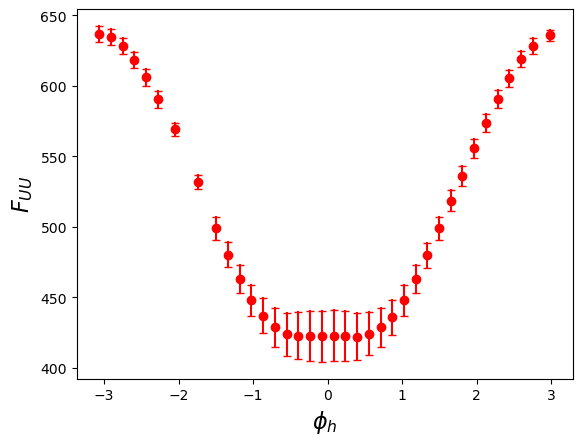

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_1_3xs=[]
Fuu_1_1_3xs=[]
Fuu_1_1_3xs_stat=[]
Fuu_1_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['phih'].tolist()
    Fuu_1_1s = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['value'].tolist()
    Fuu_1_1_stats = df_3xs_1_1[df_3xs_1_1['phih']>=i_phi_left][df_3xs_1_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_1s))
    
    if len(phih_1_1s)>0:  
        #print('phih',phih_1_1s)
        #print('Fuu',Fuu_1_1s)
        #print('Fuu_stat',Fuu_1_1_stats)
        _Fuu_1_1 = Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[0]
        _Fuu_1_1_stat = Factor_3xs*Get_weighted_average(Fuu_1_1s,Fuu_1_1_stats)[1]
        _phih_1_1= Get_weighted_average_phi(phih_1_1s,Fuu_1_1_stats)[0]
        
        print('_Fuu_1_1',_Fuu_1_1)
        print('_phih',_phih_1_1)
        print('_Fuu_stat',_Fuu_1_1_stat)
        Fuu_1_1_3xs.append(_Fuu_1_1)
        phih_1_1_3xs.append(_phih_1_1)
        Fuu_1_1_3xs_stat.append(_Fuu_1_1_stat)
        Fuu_1_1_3xs_sys.append(0.05*_Fuu_1_1)
        #print(Fuu_1_1,phih_1_1)
        ax.plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)


-3.141592653589793 -2.9845130209103035
1
-2.9845130209103035 -2.827433388230814
1
-2.827433388230814 -2.670353755551324
2
-2.670353755551324 -2.5132741228718345
0
-2.5132741228718345 -2.356194490192345
1
-2.356194490192345 -2.199114857512855
1
-2.199114857512855 -2.0420352248333655
1
-2.0420352248333655 -1.8849555921538759
1
-1.8849555921538759 -1.7278759594743864
2
-1.7278759594743864 -1.5707963267948966
0
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2648398505.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2648398505.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2648398505.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_2_stats = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2648398505.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

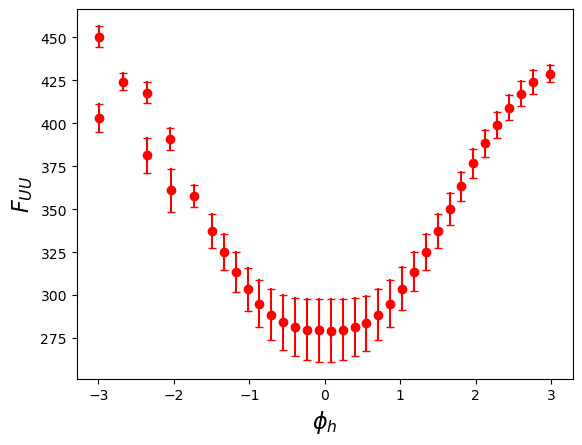

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_2_3xs=[]
Fuu_1_2_3xs=[]
Fuu_1_2_3xs_stat=[]
Fuu_1_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['phih'].tolist()
    Fuu_1_2s = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['value'].tolist()
    Fuu_1_2_stats = df_3xs_1_2[df_3xs_1_2['phih']>=i_phi_left][df_3xs_1_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_2s))
    
    if len(phih_1_2s)>0:  
        #print('phih',phih_1_2s)
        #print('Fuu',Fuu_1_2s)
        #print('Fuu_stat',Fuu_1_2_stats)
        _Fuu_1_2 = Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[0]
        _Fuu_1_2_stat = Factor_3xs*Get_weighted_average(Fuu_1_2s,Fuu_1_2_stats)[1]
        _phih_1_2= Get_weighted_average_phi(phih_1_2s,Fuu_1_2_stats)[0]
        #print('_Fuu_1_2',_Fuu_1_2)
        #print('_phih',_phih_1_2)
        #print('_Fuu_stat',_Fuu_1_2_stat)
        Fuu_1_2_3xs.append(_Fuu_1_2)
        phih_1_2_3xs.append(_phih_1_2)
        Fuu_1_2_3xs_stat.append(_Fuu_1_2_stat)
        Fuu_1_2_3xs_sys.append(0.05*_Fuu_1_2)
        #print(Fuu_1_2,phih_1_2)
        ax.plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
1
-2.9845130209103035 -2.827433388230814
1
-2.827433388230814 -2.670353755551324
1
-2.670353755551324 -2.5132741228718345
1
-2.5132741228718345 -2.356194490192345
0
-2.356194490192345 -2.199114857512855
2
-2.199114857512855 -2.0420352248333655
0
-2.0420352248333655 -1.8849555921538759
0
-1.8849555921538759 -1.7278759594743864
2
-1.7278759594743864 -1.5707963267948966
0
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2872923745.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2872923745.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2872923745.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_1_3_stats = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/2872923745.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

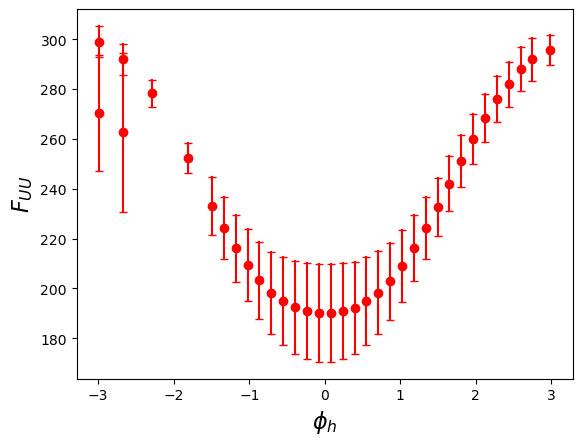

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
phih_1_3_3xs=[]
Fuu_1_3_3xs=[]
Fuu_1_3_3xs_stat=[]
Fuu_1_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['phih'].tolist()
    Fuu_1_3s = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['value'].tolist()
    Fuu_1_3_stats = df_3xs_1_3[df_3xs_1_3['phih']>=i_phi_left][df_3xs_1_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_1_3s))
    
    if len(phih_1_3s)>0:  
        #print('phih',phih_1_3s)
        #print('Fuu',Fuu_1_3s)
        #print('Fuu_stat',Fuu_1_3_stats)
        _Fuu_1_3 = Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[0]
        _Fuu_1_3_stat = Factor_3xs*Get_weighted_average(Fuu_1_3s,Fuu_1_3_stats)[1]
        _phih_1_3= Get_weighted_average_phi(phih_1_3s,Fuu_1_3_stats)[0]
        #print('_Fuu_1_3',_Fuu_1_3)
        #print('_phih',_phih_1_3)
        #print('_Fuu_stat',_Fuu_1_3_stat)
        Fuu_1_3_3xs.append(_Fuu_1_3)
        phih_1_3_3xs.append(_phih_1_3)
        Fuu_1_3_3xs_stat.append(_Fuu_1_3_stat)
        Fuu_1_3_3xs_sys.append(0.05*_Fuu_1_3)
        #print(Fuu_1_3,phih_1_3)
        ax.plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
2
-2.9845130209103035 -2.827433388230814
2
-2.827433388230814 -2.670353755551324
2
-2.670353755551324 -2.5132741228718345
2
-2.5132741228718345 -2.356194490192345
2
-2.356194490192345 -2.199114857512855
2
-2.199114857512855 -2.0420352248333655
2
-2.0420352248333655 -1.8849555921538759
2
-1.8849555921538759 -1.7278759594743864
2
-1.7278759594743864 -1.5707963267948966
2
-1.5707963267948966 -1.413716694115407
2
-1.413716694115407 -1.2566370614359172
2
-1.2566370614359172 -1.0995574287564276
2
-1.0995574287564276 -0.9424777960769379
2
-0.9424777960769379 -0.7853981633974483
2
-0.7853981633974483 -0.6283185307179586
2
-0.6283185307179586 -0.47123889803846897
2
-0.47123889803846897 -0.3141592653589793
2
-0.3141592653589793 -0.15707963267948966
2
-0.15707963267948966 0
2
0 0.15707963267948966
2
0.15707963267948966 0.3141592653589793
2
0.3141592653589793 0.47123889803846897
2
0.47123889803846897 0.6283185307179586
2
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/295057374.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/295057374.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/295057374.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_1_stats = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/295057374.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

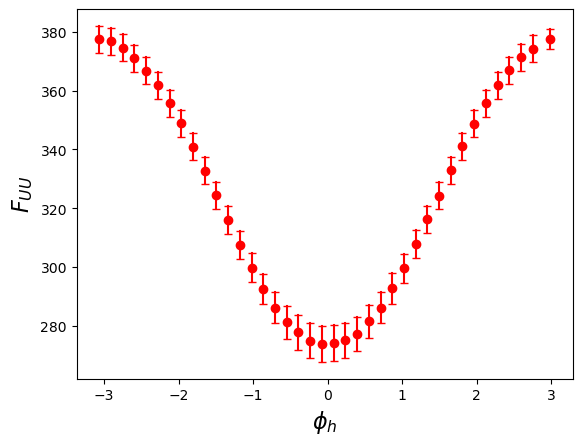

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_1_3xs=[]
Fuu_2_1_3xs=[]
Fuu_2_1_3xs_stat=[]
Fuu_2_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['phih'].tolist()
    Fuu_2_1s = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['value'].tolist()
    Fuu_2_1_stats = df_3xs_2_1[df_3xs_2_1['phih']>=i_phi_left][df_3xs_2_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_1s))
    
    if len(phih_2_1s)>0:  
        #print('phih',phih_2_1s)
        #print('Fuu',Fuu_2_1s)
        #print('Fuu_stat',Fuu_2_1_stats)
        _Fuu_2_1 = Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[0]
        _Fuu_2_1_stat = Factor_3xs*Get_weighted_average(Fuu_2_1s,Fuu_2_1_stats)[1]
        _phih_2_1= Get_weighted_average_phi(phih_2_1s,Fuu_2_1_stats)[0]
        #print('_Fuu_2_1',_Fuu_2_1)
        #print('_phih',_phih_2_1)
        #print('_Fuu_stat',_Fuu_2_1_stat)
        Fuu_2_1_3xs.append(_Fuu_2_1)
        phih_2_1_3xs.append(_phih_2_1)
        Fuu_2_1_3xs_stat.append(_Fuu_2_1_stat)
        Fuu_2_1_3xs_sys.append(0.05*_Fuu_2_1)
        #print(Fuu_2_1,phih_2_1)
        ax.plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
2
-2.9845130209103035 -2.827433388230814
2
-2.827433388230814 -2.670353755551324
2
-2.670353755551324 -2.5132741228718345
2
-2.5132741228718345 -2.356194490192345
2
-2.356194490192345 -2.199114857512855
2
-2.199114857512855 -2.0420352248333655
2
-2.0420352248333655 -1.8849555921538759
2
-1.8849555921538759 -1.7278759594743864
2
-1.7278759594743864 -1.5707963267948966
2
-1.5707963267948966 -1.413716694115407
2
-1.413716694115407 -1.2566370614359172
2
-1.2566370614359172 -1.0995574287564276
2
-1.0995574287564276 -0.9424777960769379
2
-0.9424777960769379 -0.7853981633974483
2
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1806478085.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1806478085.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1806478085.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_2_stats = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/1806478085.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

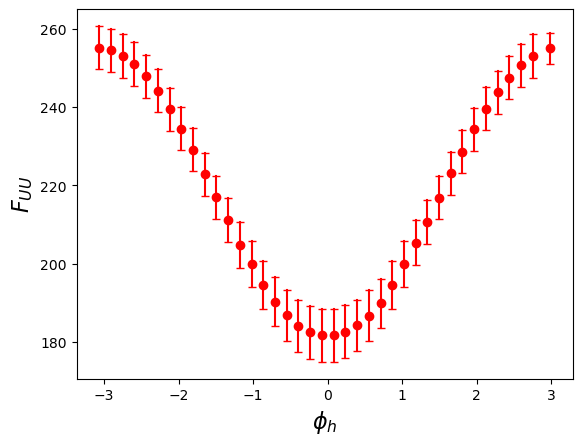

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_2_3xs=[]
Fuu_2_2_3xs=[]
Fuu_2_2_3xs_stat=[]
Fuu_2_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['phih'].tolist()
    Fuu_2_2s = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['value'].tolist()
    Fuu_2_2_stats = df_3xs_2_2[df_3xs_2_2['phih']>=i_phi_left][df_3xs_2_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_2s))
    
    if len(phih_2_2s)>0:  
        #print('phih',phih_2_2s)
        #print('Fuu',Fuu_2_2s)
        #print('Fuu_stat',Fuu_2_2_stats)
        _Fuu_2_2 = Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[0]
        _Fuu_2_2_stat = Factor_3xs*Get_weighted_average(Fuu_2_2s,Fuu_2_2_stats)[1]
        _phih_2_2= Get_weighted_average_phi(phih_2_2s,Fuu_2_2_stats)[0]
        #print('_Fuu_2_2',_Fuu_2_2)
        #print('_phih',_phih_2_2)
        #print('_Fuu_stat',_Fuu_2_2_stat)
        Fuu_2_2_3xs.append(_Fuu_2_2)
        phih_2_2_3xs.append(_phih_2_2)
        Fuu_2_2_3xs_stat.append(_Fuu_2_2_stat)
        Fuu_2_2_3xs_sys.append(0.05*_Fuu_2_2)
        #print(Fuu_2_2,phih_2_2)
        ax.plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
1
-2.9845130209103035 -2.827433388230814
1
-2.827433388230814 -2.670353755551324
1
-2.670353755551324 -2.5132741228718345
1
-2.5132741228718345 -2.356194490192345
1
-2.356194490192345 -2.199114857512855
1
-2.199114857512855 -2.0420352248333655
1
-2.0420352248333655 -1.8849555921538759
1
-1.8849555921538759 -1.7278759594743864
1
-1.7278759594743864 -1.5707963267948966
1
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/4103060561.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/4103060561.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/4103060561.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_2_3_stats = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/4103060561.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

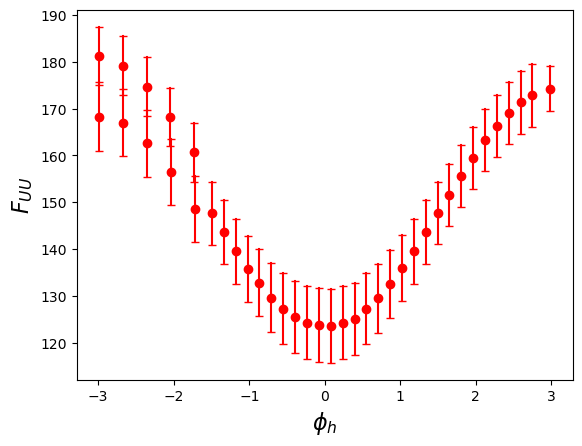

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
phih_2_3_3xs=[]
Fuu_2_3_3xs=[]
Fuu_2_3_3xs_stat=[]
Fuu_2_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['phih'].tolist()
    Fuu_2_3s = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['value'].tolist()
    Fuu_2_3_stats = df_3xs_2_3[df_3xs_2_3['phih']>=i_phi_left][df_3xs_2_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_2_3s))
    
    if len(phih_2_3s)>0:  
        #print('phih',phih_2_3s)
        #print('Fuu',Fuu_2_3s)
        #print('Fuu_stat',Fuu_2_3_stats)
        _Fuu_2_3 = Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[0]
        _Fuu_2_3_stat = Factor_3xs*Get_weighted_average(Fuu_2_3s,Fuu_2_3_stats)[1]
        _phih_2_3= Get_weighted_average_phi(phih_2_3s,Fuu_2_3_stats)[0]
        #print('_Fuu_2_3',_Fuu_2_3)
        #print('_phih',_phih_2_3)
        #print('_Fuu_stat',_Fuu_2_3_stat)
        Fuu_2_3_3xs.append(_Fuu_2_3)
        phih_2_3_3xs.append(_phih_2_3)
        Fuu_2_3_3xs_stat.append(_Fuu_2_3_stat)
        Fuu_2_3_3xs_sys.append(0.05*_Fuu_2_3)
        #print(Fuu_2_3,phih_2_3)
        ax.plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
2
-2.9845130209103035 -2.827433388230814
2
-2.827433388230814 -2.670353755551324
2
-2.670353755551324 -2.5132741228718345
2
-2.5132741228718345 -2.356194490192345
2
-2.356194490192345 -2.199114857512855
2
-2.199114857512855 -2.0420352248333655
2
-2.0420352248333655 -1.8849555921538759
2
-1.8849555921538759 -1.7278759594743864
2
-1.7278759594743864 -1.5707963267948966
2
-1.5707963267948966 -1.413716694115407
2
-1.413716694115407 -1.2566370614359172
2
-1.2566370614359172 -1.0995574287564276
2
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3716539223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3716539223.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3716539223.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_1_stats = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3716539223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

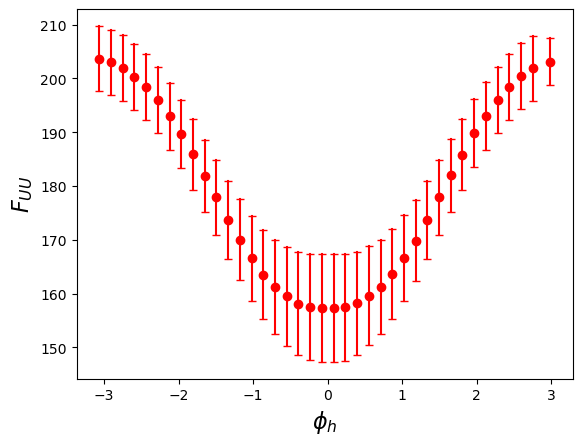

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_1_3xs=[]
Fuu_3_1_3xs=[]
Fuu_3_1_3xs_stat=[]
Fuu_3_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['phih'].tolist()
    Fuu_3_1s = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['value'].tolist()
    Fuu_3_1_stats = df_3xs_3_1[df_3xs_3_1['phih']>=i_phi_left][df_3xs_3_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_1s))
    
    if len(phih_3_1s)>0:  
        #print('phih',phih_3_1s)
        #print('Fuu',Fuu_3_1s)
        #print('Fuu_stat',Fuu_3_1_stats)
        _Fuu_3_1 = Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[0]
        _Fuu_3_1_stat = Factor_3xs*Get_weighted_average(Fuu_3_1s,Fuu_3_1_stats)[1]
        _phih_3_1= Get_weighted_average_phi(phih_3_1s,Fuu_3_1_stats)[0]
        #print('_Fuu_3_1',_Fuu_3_1)
        #print('_phih',_phih_3_1)
        #print('_Fuu_stat',_Fuu_3_1_stat)
        Fuu_3_1_3xs.append(_Fuu_3_1)
        phih_3_1_3xs.append(_phih_3_1)
        Fuu_3_1_3xs_stat.append(_Fuu_3_1_stat)
        Fuu_3_1_3xs_sys.append(0.05*_Fuu_3_1)
        #print(Fuu_3_1,phih_3_1)
        ax.plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
2
-2.9845130209103035 -2.827433388230814
2
-2.827433388230814 -2.670353755551324
2
-2.670353755551324 -2.5132741228718345
2
-2.5132741228718345 -2.356194490192345
2
-2.356194490192345 -2.199114857512855
2
-2.199114857512855 -2.0420352248333655
2
-2.0420352248333655 -1.8849555921538759
2
-1.8849555921538759 -1.7278759594743864
1
-1.7278759594743864 -1.5707963267948966
1
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3194809815.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3194809815.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3194809815.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_2_stats = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/3194809815.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_

Text(0, 0.5, '$F_{UU}$')

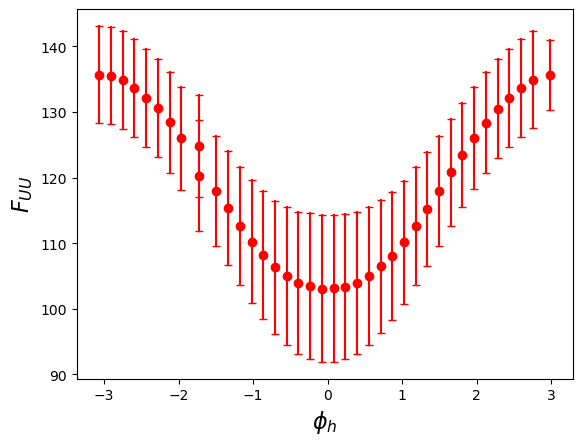

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_2_3xs=[]
Fuu_3_2_3xs=[]
Fuu_3_2_3xs_stat=[]
Fuu_3_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['phih'].tolist()
    Fuu_3_2s = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['value'].tolist()
    Fuu_3_2_stats = df_3xs_3_2[df_3xs_3_2['phih']>=i_phi_left][df_3xs_3_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_2s))
    
    if len(phih_3_2s)>0:  
        #print('phih',phih_3_2s)
        #print('Fuu',Fuu_3_2s)
        #print('Fuu_stat',Fuu_3_2_stats)
        _Fuu_3_2 = Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[0]
        _Fuu_3_2_stat = Factor_3xs*Get_weighted_average(Fuu_3_2s,Fuu_3_2_stats)[1]
        _phih_3_2= Get_weighted_average_phi(phih_3_2s,Fuu_3_2_stats)[0]
        #print('_Fuu_3_2',_Fuu_3_2)
        #print('_phih',_phih_3_2)
        #print('_Fuu_stat',_Fuu_3_2_stat)
        Fuu_3_2_3xs.append(_Fuu_3_2)
        phih_3_2_3xs.append(_phih_3_2)
        Fuu_3_2_3xs_stat.append(_Fuu_3_2_stat)
        Fuu_3_2_3xs_sys.append(0.05*_Fuu_3_2)
        #print(Fuu_3_2,phih_3_2)
        ax.plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
1
-2.9845130209103035 -2.827433388230814
1
-2.827433388230814 -2.670353755551324
1
-2.670353755551324 -2.5132741228718345
1
-2.5132741228718345 -2.356194490192345
1
-2.356194490192345 -2.199114857512855
1
-2.199114857512855 -2.0420352248333655
1
-2.0420352248333655 -1.8849555921538759
1
-1.8849555921538759 -1.7278759594743864
2
-1.7278759594743864 -1.5707963267948966
0
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/805822727.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/805822727.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/805822727.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_3_3_stats = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/805822727.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

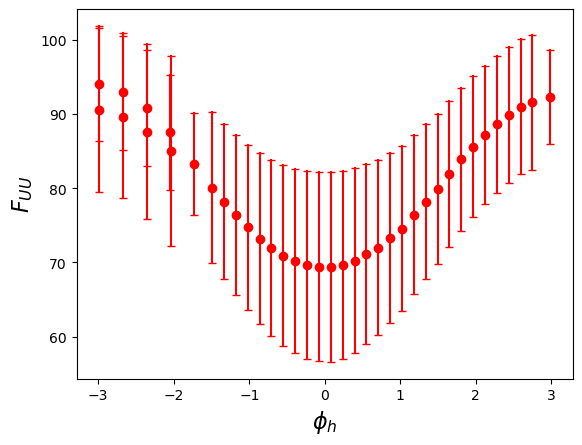

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
phih_3_3_3xs=[]
Fuu_3_3_3xs=[]
Fuu_3_3_3xs_stat=[]
Fuu_3_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['phih'].tolist()
    Fuu_3_3s = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['value'].tolist()
    Fuu_3_3_stats = df_3xs_3_3[df_3xs_3_3['phih']>=i_phi_left][df_3xs_3_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_3_3s))
    
    if len(phih_3_3s)>0:  
        #print('phih',phih_3_3s)
        #print('Fuu',Fuu_3_3s)
        #print('Fuu_stat',Fuu_3_3_stats)
        _Fuu_3_3 = Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[0]
        _Fuu_3_3_stat = Factor_3xs*Get_weighted_average(Fuu_3_3s,Fuu_3_3_stats)[1]
        _phih_3_3= Get_weighted_average_phi(phih_3_3s,Fuu_3_3_stats)[0]
        #print('_Fuu_3_3',_Fuu_3_3)
        #print('_phih',_phih_3_3)
        #print('_Fuu_stat',_Fuu_3_3_stat)
        Fuu_3_3_3xs.append(_Fuu_3_3)
        phih_3_3_3xs.append(_phih_3_3)
        Fuu_3_3_3xs_stat.append(_Fuu_3_3_stat)
        Fuu_3_3_3xs_sys.append(0.05*_Fuu_3_3)
        #print(Fuu_3_3,phih_3_3)
        ax.plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
0
-2.9845130209103035 -2.827433388230814
2
-2.827433388230814 -2.670353755551324
2
-2.670353755551324 -2.5132741228718345
0
-2.5132741228718345 -2.356194490192345
2
-2.356194490192345 -2.199114857512855
0
-2.199114857512855 -2.0420352248333655
2
-2.0420352248333655 -1.8849555921538759
0
-1.8849555921538759 -1.7278759594743864
1
-1.7278759594743864 -1.5707963267948966
0
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/650790593.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/650790593.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/650790593.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_1_stats = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/650790593.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

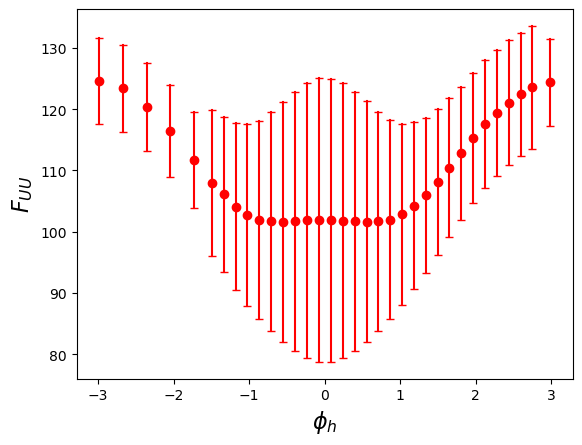

In [29]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_1_3xs=[]
Fuu_4_1_3xs=[]
Fuu_4_1_3xs_stat=[]
Fuu_4_1_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['phih'].tolist()
    Fuu_4_1s = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['value'].tolist()
    Fuu_4_1_stats = df_3xs_4_1[df_3xs_4_1['phih']>=i_phi_left][df_3xs_4_1['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_1s))
    
    if len(phih_4_1s)>0:  
        #print('phih',phih_4_1s)
        #print('Fuu',Fuu_4_1s)
        #print('Fuu_stat',Fuu_4_1_stats)
        _Fuu_4_1 = Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[0]
        _Fuu_4_1_stat = Factor_3xs*Get_weighted_average(Fuu_4_1s,Fuu_4_1_stats)[1]
        _phih_4_1= Get_weighted_average_phi(phih_4_1s,Fuu_4_1_stats)[0]
        #print('_Fuu_4_1',_Fuu_4_1)
        #print('_phih',_phih_4_1)
        #print('_Fuu_stat',_Fuu_4_1_stat)
        Fuu_4_1_3xs.append(_Fuu_4_1)
        phih_4_1_3xs.append(_phih_4_1)
        Fuu_4_1_3xs_stat.append(_Fuu_4_1_stat)
        Fuu_4_1_3xs_sys.append(0.05*_Fuu_4_1)
        #print(Fuu_4_1,phih_4_1)
        ax.plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
0
-2.9845130209103035 -2.827433388230814
2
-2.827433388230814 -2.670353755551324
0
-2.670353755551324 -2.5132741228718345
0
-2.5132741228718345 -2.356194490192345
2
-2.356194490192345 -2.199114857512855
0
-2.199114857512855 -2.0420352248333655
0
-2.0420352248333655 -1.8849555921538759
2
-1.8849555921538759 -1.7278759594743864
0
-1.7278759594743864 -1.5707963267948966
1
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/697246916.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/697246916.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/697246916.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_2_stats = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/697246916.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

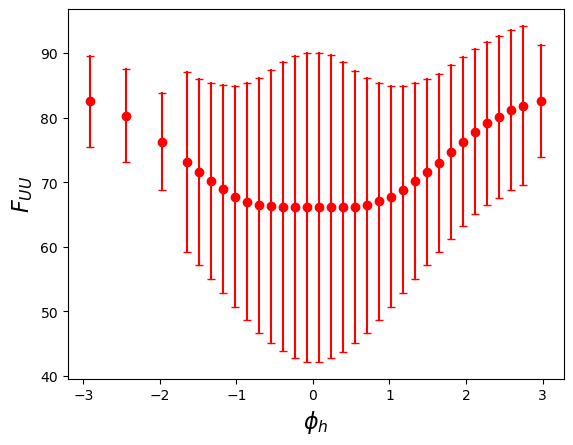

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_2_3xs=[]
Fuu_4_2_3xs=[]
Fuu_4_2_3xs_stat=[]
Fuu_4_2_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['phih'].tolist()
    Fuu_4_2s = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['value'].tolist()
    Fuu_4_2_stats = df_3xs_4_2[df_3xs_4_2['phih']>=i_phi_left][df_3xs_4_2['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_2s))
    
    if len(phih_4_2s)>0:  
        #print('phih',phih_4_2s)
        #print('Fuu',Fuu_4_2s)
        #print('Fuu_stat',Fuu_4_2_stats)
        _Fuu_4_2 = Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[0]
        _Fuu_4_2_stat = Factor_3xs*Get_weighted_average(Fuu_4_2s,Fuu_4_2_stats)[1]
        _phih_4_2= Get_weighted_average_phi(phih_4_2s,Fuu_4_2_stats)[0]
        #print('_Fuu_4_2',_Fuu_4_2)
        #print('_phih',_phih_4_2)
        #print('_Fuu_stat',_Fuu_4_2_stat)
        Fuu_4_2_3xs.append(_Fuu_4_2)
        phih_4_2_3xs.append(_phih_4_2)
        Fuu_4_2_3xs_stat.append(_Fuu_4_2_stat)
        Fuu_4_2_3xs_sys.append(0.05*_Fuu_4_2)
        #print(Fuu_4_2,phih_4_2)
        ax.plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

-3.141592653589793 -2.9845130209103035
0
-2.9845130209103035 -2.827433388230814
2
-2.827433388230814 -2.670353755551324
0
-2.670353755551324 -2.5132741228718345
0
-2.5132741228718345 -2.356194490192345
0
-2.356194490192345 -2.199114857512855
1
-2.199114857512855 -2.0420352248333655
0
-2.0420352248333655 -1.8849555921538759
0
-1.8849555921538759 -1.7278759594743864
1
-1.7278759594743864 -1.5707963267948966
0
-1.5707963267948966 -1.413716694115407
1
-1.413716694115407 -1.2566370614359172
1
-1.2566370614359172 -1.0995574287564276
1
-1.0995574287564276 -0.9424777960769379
1
-0.9424777960769379 -0.7853981633974483
1
-0.7853981633974483 -0.6283185307179586
1
-0.6283185307179586 -0.47123889803846897
1
-0.47123889803846897 -0.3141592653589793
1
-0.3141592653589793 -0.15707963267948966
1
-0.15707963267948966 0
1
0 0.15707963267948966
1
0.15707963267948966 0.3141592653589793
1
0.3141592653589793 0.47123889803846897
1
0.47123889803846897 0.6283185307179586
1
0.6283185307179586 0.7853981633974483


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/879100309.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['phih'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/879100309.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['value'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/879100309.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_4_3_stats = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['stat'].tolist()
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_70092/879100309.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_

Text(0, 0.5, '$F_{UU}$')

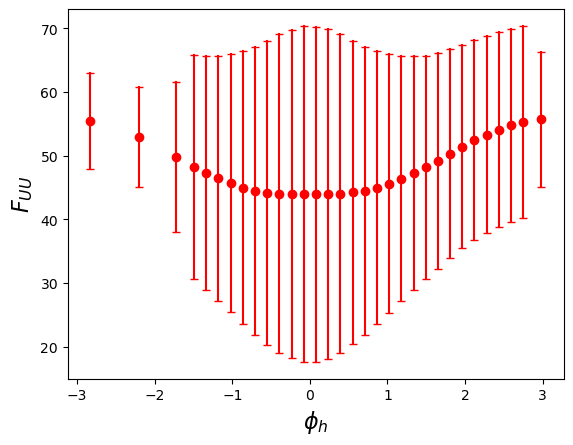

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
phih_4_3_3xs=[]
Fuu_4_3_3xs=[]
Fuu_4_3_3xs_stat=[]
Fuu_4_3_3xs_sys=[]
i_phi_left = phih_bins[0]
for i_phi in phih_bins[1:]:
    print(i_phi_left,i_phi)
    phih_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['phih'].tolist()
    Fuu_4_3s = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['value'].tolist()
    Fuu_4_3_stats = df_3xs_4_3[df_3xs_4_3['phih']>=i_phi_left][df_3xs_4_3['phih']<i_phi]['stat'].tolist()
    print(len(phih_4_3s))
    
    if len(phih_4_3s)>0:  
        #print('phih',phih_4_3s)
        #print('Fuu',Fuu_4_3s)
        #print('Fuu_stat',Fuu_4_3_stats)
        _Fuu_4_3 = Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[0]
        _Fuu_4_3_stat = Factor_3xs*Get_weighted_average(Fuu_4_3s,Fuu_4_3_stats)[1]
        _phih_4_3= Get_weighted_average_phi(phih_4_3s,Fuu_4_3_stats)[0]
        #print('_Fuu_4_3',_Fuu_4_3)
        #print('_phih',_phih_4_3)
        #print('_Fuu_stat',_Fuu_4_3_stat)
        Fuu_4_3_3xs.append(_Fuu_4_3)
        phih_4_3_3xs.append(_phih_4_3)
        Fuu_4_3_3xs_stat.append(_Fuu_4_3_stat)
        Fuu_4_3_3xs_sys.append(0.05*_Fuu_4_3)
        #print(Fuu_4_3,phih_4_3)
        ax.plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
    i_phi_left = i_phi
    #print('phileft',i_phi_left)
plt.plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
plt.xlabel('$\phi_h$',fontsize=16)
plt.ylabel('$F_{UU}$',fontsize=16)

Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\\phi_h}$ [$nb/GeV^2$]')

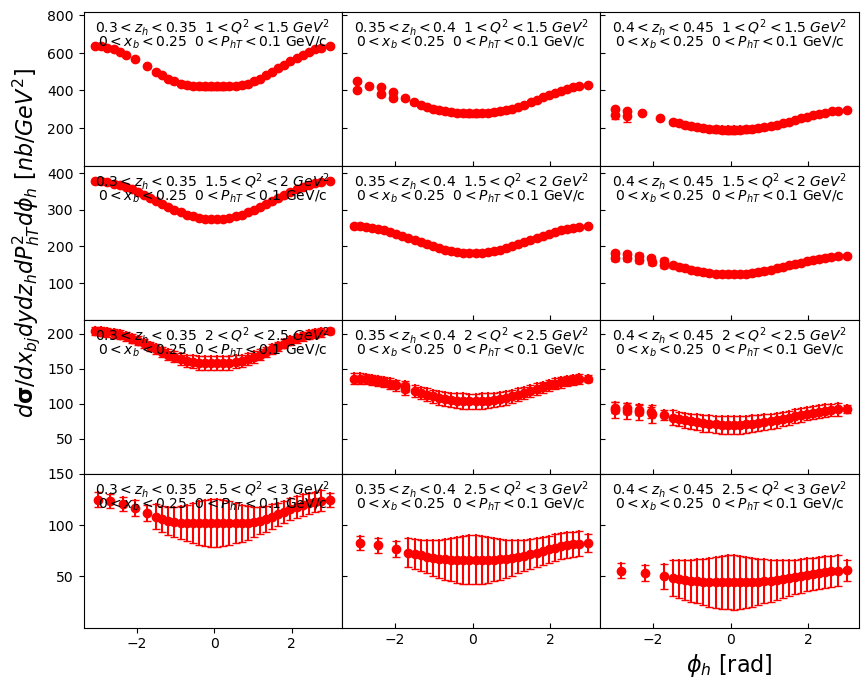

In [32]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#over large
Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=200;Y_second_max=100;Y_third_max=50;Y_fourth_max = 20
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006

for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylim(0.0002,Y_first_max)
#axs[0][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_ylim(0.0002,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_ylim(0.0002,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_ylim(0.0002,Y_second_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_ylim(0.0002,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_ylim(0.0002,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_ylim(0.0002,Y_third_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_ylim(0.0002,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_ylim(0.0002,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
for i_4_1_3xs in range(0,len(phih_4_1_3xs)):
    _phih_4_1 = phih_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1 = Fuu_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1_stat = Fuu_4_1_3xs_stat[i_4_1_3xs]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
axs[3][0].plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
#axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][0].set_ylim(0.0002,Y_fourth_max)
#axs[3][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
for i_4_2_3xs in range(0,len(phih_4_2_3xs)):
    _phih_4_2 = phih_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2 = Fuu_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2_stat = Fuu_4_2_3xs_stat[i_4_2_3xs]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
axs[3][1].plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
#axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][1].set_ylim(0.0002,Y_fourth_max)
axs[3][1].tick_params(direction='in',labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

for i_4_3_3xs in range(0,len(phih_4_3_3xs)):
    _phih_4_3 = phih_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3 = Fuu_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3_stat = Fuu_4_3_3xs_stat[i_4_3_3xs]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
axs[3][2].plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
#axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][2].set_ylim(0.0002,Y_fourth_max)
axs[3][2].tick_params(direction='in',labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')

In [33]:
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

#def Simple_fit(phi,A,B):
#    return A*(1-B*np.cos(phi))
#print(Simple_fit(0,1,2))
def Simple_fit(phi,A,B,C):
    return A*(1-B*np.cos(phi)-C*np.cos(2*phi))

iminuit version: 2.25.2


In [34]:
least_squares_1_1 = LeastSquares(df_3xs_1_1['phih'],Factor*df_3xs_1_1['value'],Factor*Factor_3xs*df_3xs_1_1['stat'],Simple_fit)
m_1_1 = Minuit(least_squares_1_1,A=0,B=0,C=0)
m_1_1.migrad()
m_1_1.hesse()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 199.1 (χ²/ndof = 4.1)      │              Nfcn = 115              │
│ EDM = 7.03e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   517.0   │    1.7    │            │            │         │         │       │
│ 1 │ B    │   0.221   │   0.005   │            │            │         │         │       │
│ 2 │ C    │  -0.015   │   0.004   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         A         B         C │
├───┼───────────────────────────────┤
│ A │      2.77 -6.801e-3 -2.138e-3 │
│ B │ -6.801e-3  3.01e-05  0.011e-3 │
│ C │ -2.138e-3  0.011e-3  1.52e-05 │
└───┴───────────────────────────────┘

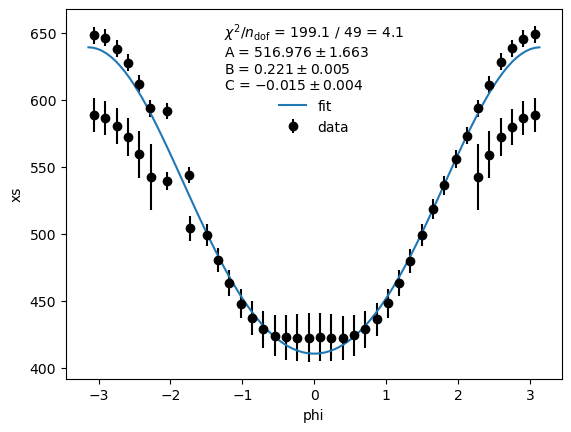

In [35]:
# draw data and fitted line
phi_bins = np.linspace(-3.14,3.13,100)
plt.errorbar(df_3xs_1_1['phih'],Factor*df_3xs_1_1['value'],Factor*Factor_3xs*df_3xs_1_1['stat'], fmt="ok", label="data")
plt.plot(phi_bins, Simple_fit(phi_bins, *m_1_1.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_1.fval:.1f} / {m_1_1.ndof:.0f} = {m_1_1.fmin.reduced_chi2:.1f}",
]
for p_1_1, v_1_1, e_1_1 in zip(m_1_1.parameters, m_1_1.values, m_1_1.errors):
    fit_info.append(f"{p_1_1} = ${v_1_1:.3f} \\pm {e_1_1:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False)
plt.xlabel("phi")
plt.ylabel("xs");


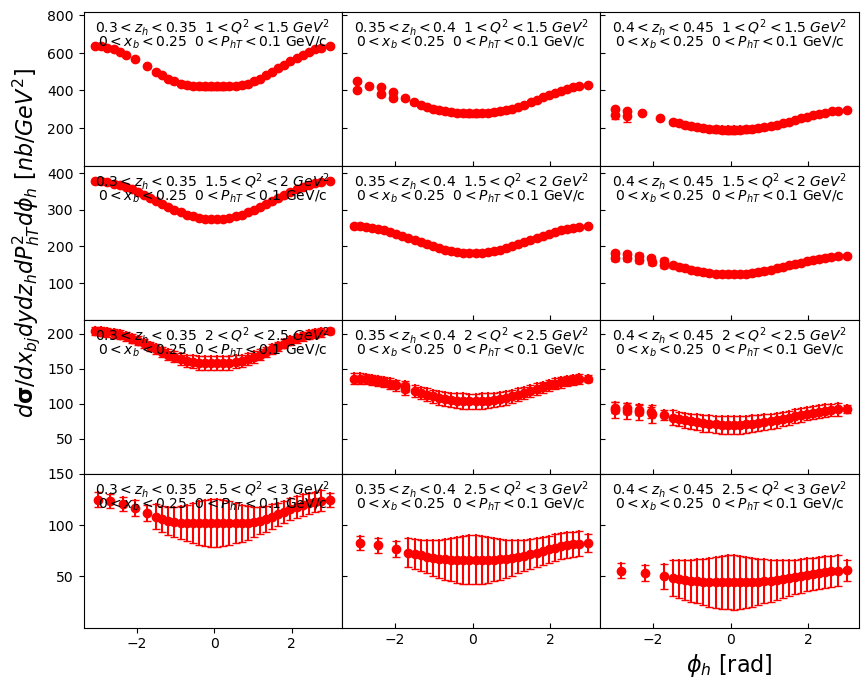

In [44]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.xlabel('$\phi_h$ [rad]',fontsize=16)
#over large
Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=820;Y_second_max=420;Y_third_max=220;Y_fourth_max = 150
#Y_first_max=200;Y_second_max=100;Y_third_max=50;Y_fourth_max = 20
#large
#Y_first_max=0.18;Y_second_max=0.07;Y_third_max=0.024;Y_fourth_max = 0.012
#small2
#Y_first_max=0.04;Y_second_max=0.03;Y_third_max=0.02;Y_fourth_max = 0.012
#small
#Y_first_max=0.09;Y_second_max=0.04;Y_third_max=0.01;Y_fourth_max=0.006

for i_1_1_3xs in range(0,len(phih_1_1_3xs)):
    _phih_1_1 = phih_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1 = Fuu_1_1_3xs[i_1_1_3xs]
    _Fuu_1_1_stat = Fuu_1_1_3xs_stat[i_1_1_3xs]
    axs[0][0].plot([_phih_1_1,_phih_1_1],[_Fuu_1_1-_Fuu_1_1_stat,_Fuu_1_1+_Fuu_1_1_stat],color='red',marker='_')
axs[0][0].plot(phih_1_1_3xs,Fuu_1_1_3xs,'ro')
#axs[0][0].fill_between(phih_1_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][0].set_ylim(0.0002,Y_first_max)
least_squares_1_1 = LeastSquares(df_3xs_1_1['phih'],Factor*df_3xs_1_1['value'],Factor*Factor_3xs*df_3xs_1_1['stat'],Simple_fit)
m_1_1 = Minuit(least_squares_1_1,A=0,B=0,C=0)
m_1_1.migrad()
m_1_1.hesse()
#axs[0][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
for i_1_2_3xs in range(0,len(phih_1_2_3xs)):
    _phih_1_2 = phih_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2 = Fuu_1_2_3xs[i_1_2_3xs]
    _Fuu_1_2_stat = Fuu_1_2_3xs_stat[i_1_2_3xs]
    axs[0][1].plot([_phih_1_2,_phih_1_2],[_Fuu_1_2-_Fuu_1_2_stat,_Fuu_1_2+_Fuu_1_2_stat],color='red',marker='_')
axs[0][1].plot(phih_1_2_3xs,Fuu_1_2_3xs,'ro')
#axs[0][1].fill_between(phih_1_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][1].set_ylim(0.0002,Y_first_max)
axs[0][1].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_1_2 = LeastSquares(df_3xs_1_2['phih'],Factor*df_3xs_1_2['value'],Factor*Factor_3xs*df_3xs_1_2['stat'],Simple_fit)
m_1_2 = Minuit(least_squares_1_2,A=0,B=0,C=0)
m_1_2.migrad()
m_1_2.hesse()
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
for i_1_3_3xs in range(0,len(phih_1_3_3xs)):
    _phih_1_3 = phih_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3 = Fuu_1_3_3xs[i_1_3_3xs]
    _Fuu_1_3_stat = Fuu_1_3_3xs_stat[i_1_3_3xs]
    axs[0][2].plot([_phih_1_3,_phih_1_3],[_Fuu_1_3-_Fuu_1_3_stat,_Fuu_1_3+_Fuu_1_3_stat],color='red',marker='_')
axs[0][2].plot(phih_1_3_3xs,Fuu_1_3_3xs,'ro')
#axs[0][2].fill_between(phih_1_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_1_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[0][2].set_ylim(0.0002,Y_first_max)
axs[0][2].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_1_3 = LeastSquares(df_3xs_1_3['phih'],Factor*df_3xs_1_3['value'],Factor*Factor_3xs*df_3xs_1_3['stat'],Simple_fit)
m_1_3 = Minuit(least_squares_1_3,A=0,B=0,C=0)
m_1_3.migrad()
m_1_3.hesse()
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
for i_2_1_3xs in range(0,len(phih_2_1_3xs)):
    _phih_2_1 = phih_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1 = Fuu_2_1_3xs[i_2_1_3xs]
    _Fuu_2_1_stat = Fuu_2_1_3xs_stat[i_2_1_3xs]
    axs[1][0].plot([_phih_2_1,_phih_2_1],[_Fuu_2_1-_Fuu_2_1_stat,_Fuu_2_1+_Fuu_2_1_stat],color='red',marker='_')
axs[1][0].plot(phih_2_1_3xs,Fuu_2_1_3xs,'ro')
#axs[1][0].fill_between(phih_2_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][0].set_ylim(0.0002,Y_second_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_2_1 = LeastSquares(df_3xs_2_1['phih'],Factor*df_3xs_2_1['value'],Factor*Factor_3xs*df_3xs_2_1['stat'],Simple_fit)
m_2_1 = Minuit(least_squares_2_1,A=0,B=0,C=0)
m_2_1.migrad()
m_2_1.hesse()
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
for i_2_2_3xs in range(0,len(phih_2_2_3xs)):
    _phih_2_2 = phih_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2 = Fuu_2_2_3xs[i_2_2_3xs]
    _Fuu_2_2_stat = Fuu_2_2_3xs_stat[i_2_2_3xs]
    axs[1][1].plot([_phih_2_2,_phih_2_2],[_Fuu_2_2-_Fuu_2_2_stat,_Fuu_2_2+_Fuu_2_2_stat],color='red',marker='_')
axs[1][1].plot(phih_2_2_3xs,Fuu_2_2_3xs,'ro')
#axs[1][1].fill_between(phih_2_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][1].set_ylim(0.0002,Y_second_max)
axs[1][1].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_2_2 = LeastSquares(df_3xs_2_2['phih'],Factor*df_3xs_2_2['value'],Factor*Factor_3xs*df_3xs_2_2['stat'],Simple_fit)
m_2_2 = Minuit(least_squares_2_2,A=0,B=0,C=0)
m_2_2.migrad()
m_2_2.hesse()
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
for i_2_3_3xs in range(0,len(phih_2_3_3xs)):
    _phih_2_3 = phih_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3 = Fuu_2_3_3xs[i_2_3_3xs]
    _Fuu_2_3_stat = Fuu_2_3_3xs_stat[i_2_3_3xs]
    axs[1][2].plot([_phih_2_3,_phih_2_3],[_Fuu_2_3-_Fuu_2_3_stat,_Fuu_2_3+_Fuu_2_3_stat],color='red',marker='_')
axs[1][2].plot(phih_2_3_3xs,Fuu_2_3_3xs,'ro')
#axs[1][2].fill_between(phih_2_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_2_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[1][2].set_ylim(0.0002,Y_second_max)
axs[1][2].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_2_3 = LeastSquares(df_3xs_2_3['phih'],Factor*df_3xs_2_3['value'],Factor*Factor_3xs*df_3xs_2_3['stat'],Simple_fit)
m_2_3 = Minuit(least_squares_2_3,A=0,B=0,C=0)
m_2_3.migrad()
m_2_3.hesse()
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
for i_3_1_3xs in range(0,len(phih_3_1_3xs)):
    _phih_3_1 = phih_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1 = Fuu_3_1_3xs[i_3_1_3xs]
    _Fuu_3_1_stat = Fuu_3_1_3xs_stat[i_3_1_3xs]
    axs[2][0].plot([_phih_3_1,_phih_3_1],[_Fuu_3_1-_Fuu_3_1_stat,_Fuu_3_1+_Fuu_3_1_stat],color='red',marker='_')
axs[2][0].plot(phih_3_1_3xs,Fuu_3_1_3xs,'ro')
#axs[2][0].fill_between(phih_3_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][0].set_ylim(0.0002,Y_third_max)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_3_1 = LeastSquares(df_3xs_3_1['phih'],Factor*df_3xs_3_1['value'],Factor*Factor_3xs*df_3xs_3_1['stat'],Simple_fit)
m_3_1 = Minuit(least_squares_3_1,A=0,B=0,C=0)
m_3_1.migrad()
m_3_1.hesse()
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
for i_3_2_3xs in range(0,len(phih_3_2_3xs)):
    _phih_3_2 = phih_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2 = Fuu_3_2_3xs[i_3_2_3xs]
    _Fuu_3_2_stat = Fuu_3_2_3xs_stat[i_3_2_3xs]
    axs[2][1].plot([_phih_3_2,_phih_3_2],[_Fuu_3_2-_Fuu_3_2_stat,_Fuu_3_2+_Fuu_3_2_stat],color='red',marker='_')
axs[2][1].plot(phih_3_2_3xs,Fuu_3_2_3xs,'ro')
#axs[2][1].fill_between(phih_3_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][1].set_ylim(0.0002,Y_third_max)
axs[2][1].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_3_2 = LeastSquares(df_3xs_3_2['phih'],Factor*df_3xs_3_2['value'],Factor*Factor_3xs*df_3xs_3_2['stat'],Simple_fit)
m_3_2 = Minuit(least_squares_3_2,A=0,B=0,C=0)
m_3_2.migrad()
m_3_2.hesse()
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
for i_3_3_3xs in range(0,len(phih_3_3_3xs)):
    _phih_3_3 = phih_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3 = Fuu_3_3_3xs[i_3_3_3xs]
    _Fuu_3_3_stat = Fuu_3_3_3xs_stat[i_3_3_3xs]
    axs[2][2].plot([_phih_3_3,_phih_3_3],[_Fuu_3_3-_Fuu_3_3_stat,_Fuu_3_3+_Fuu_3_3_stat],color='red',marker='_')
axs[2][2].plot(phih_3_3_3xs,Fuu_3_3_3xs,'ro')
#axs[2][2].fill_between(phih_3_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_3_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[2][2].set_ylim(0.0002,Y_third_max)
axs[2][2].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_3_3 = LeastSquares(df_3xs_3_3['phih'],Factor*df_3xs_3_3['value'],Factor*Factor_3xs*df_3xs_3_3['stat'],Simple_fit)
m_3_3 = Minuit(least_squares_3_3,A=0,B=0,C=0)
m_3_3.migrad()
m_3_3.hesse()
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
for i_4_1_3xs in range(0,len(phih_4_1_3xs)):
    _phih_4_1 = phih_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1 = Fuu_4_1_3xs[i_4_1_3xs]
    _Fuu_4_1_stat = Fuu_4_1_3xs_stat[i_4_1_3xs]
    axs[3][0].plot([_phih_4_1,_phih_4_1],[_Fuu_4_1-_Fuu_4_1_stat,_Fuu_4_1+_Fuu_4_1_stat],color='red',marker='_')
axs[3][0].plot(phih_4_1_3xs,Fuu_4_1_3xs,'ro')
#axs[3][0].fill_between(phih_4_1_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_1_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][0].set_ylim(0.0002,Y_fourth_max)
#axs[3][0].tick_params(direction='in',labelbottom=False,labelleft=False)
least_squares_4_1 = LeastSquares(df_3xs_4_1['phih'],Factor*df_3xs_4_1['value'],Factor*Factor_3xs*df_3xs_4_1['stat'],Simple_fit)
m_4_1 = Minuit(least_squares_4_1,A=0,B=0,C=0)
m_4_1.migrad()
m_4_1.hesse()
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
for i_4_2_3xs in range(0,len(phih_4_2_3xs)):
    _phih_4_2 = phih_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2 = Fuu_4_2_3xs[i_4_2_3xs]
    _Fuu_4_2_stat = Fuu_4_2_3xs_stat[i_4_2_3xs]
    axs[3][1].plot([_phih_4_2,_phih_4_2],[_Fuu_4_2-_Fuu_4_2_stat,_Fuu_4_2+_Fuu_4_2_stat],color='red',marker='_')
axs[3][1].plot(phih_4_2_3xs,Fuu_4_2_3xs,'ro')
#axs[3][1].fill_between(phih_4_2_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_2_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][1].set_ylim(0.0002,Y_fourth_max)
axs[3][1].tick_params(direction='in',labelleft=False)
least_squares_4_2 = LeastSquares(df_3xs_4_2['phih'],Factor*df_3xs_4_2['value'],Factor*Factor_3xs*df_3xs_4_2['stat'],Simple_fit)
m_4_2 = Minuit(least_squares_4_2,A=0,B=0,C=0)
m_4_2.migrad()
m_4_2.hesse()
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

for i_4_3_3xs in range(0,len(phih_4_3_3xs)):
    _phih_4_3 = phih_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3 = Fuu_4_3_3xs[i_4_3_3xs]
    _Fuu_4_3_stat = Fuu_4_3_3xs_stat[i_4_3_3xs]
    axs[3][2].plot([_phih_4_3,_phih_4_3],[_Fuu_4_3-_Fuu_4_3_stat,_Fuu_4_3+_Fuu_4_3_stat],color='red',marker='_')
axs[3][2].plot(phih_4_3_3xs,Fuu_4_3_3xs,'ro')
#axs[3][2].fill_between(phih_4_3_3xs,np.asarray(0),np.asarray(0)+np.asarray(Fuu_4_3_3xs_sys),color='red',hatch='\\\\\\\\',alpha=0.25,linewidth=0)
axs[3][2].set_ylim(0.0002,Y_fourth_max)
axs[3][2].tick_params(direction='in',labelleft=False)
least_squares_4_3 = LeastSquares(df_3xs_4_3['phih'],Factor*df_3xs_4_3['value'],Factor*Factor_3xs*df_3xs_4_3['stat'],Simple_fit)
m_4_3 = Minuit(least_squares_4_3,A=0,B=0,C=0)
m_4_3.migrad()
m_4_3.hesse()
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/2024_morephi/3xs_moremorephi.pdf')

In [37]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_1.fval:.1f} / {m_1_1.ndof:.0f} = {m_1_1.fmin.reduced_chi2:.1f}",
]
for p_1_1, v_1_1, e_1_1 in zip(m_1_1.parameters, m_1_1.values, m_1_1.errors):
    fit_info.append(f"{p_1_1} = ${v_1_1:.3f} \\pm {e_1_1:.3f}$")
print("for 1 1", fit_info)

for 1 1 ['$\\chi^2$/$n_\\mathrm{dof}$ = 199.1 / 49 = 4.1', 'A = $516.976 \\pm 1.663$', 'B = $0.221 \\pm 0.005$', 'C = $-0.015 \\pm 0.004$']


In [38]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_2.fval:.1f} / {m_1_2.ndof:.0f} = {m_1_2.fmin.reduced_chi2:.1f}",
]
for p_1_2, v_1_2, e_1_2 in zip(m_1_2.parameters, m_1_2.values, m_1_2.errors):
    fit_info.append(f"{p_1_2} = ${v_1_2:.3f} \\pm {e_1_2:.3f}$")
print("for 1 1", fit_info)

for 1 1 ['$\\chi^2$/$n_\\mathrm{dof}$ = 53.4 / 37 = 1.4', 'A = $349.104 \\pm 1.833$', 'B = $0.227 \\pm 0.009$', 'C = $-0.014 \\pm 0.007$']


In [39]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_1_3.fval:.1f} / {m_1_3.ndof:.0f} = {m_1_3.fmin.reduced_chi2:.1f}",
]
for p_1_3, v_1_3, e_1_3 in zip(m_1_3.parameters, m_1_3.values, m_1_3.errors):
    fit_info.append(f"{p_1_3} = ${v_1_3:.3f} \\pm {e_1_3:.3f}$")
print("for 1 1", fit_info)

for 1 1 ['$\\chi^2$/$n_\\mathrm{dof}$ = 7.6 / 35 = 0.2', 'A = $240.366 \\pm 2.089$', 'B = $0.229 \\pm 0.014$', 'C = $-0.010 \\pm 0.011$']


In [40]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_4_3.fval:.1f} / {m_4_3.ndof:.0f} = {m_4_3.fmin.reduced_chi2:.1f}",
]
for p_4_3, v_4_3, e_4_3 in zip(m_4_3.parameters, m_4_3.values, m_4_3.errors):
    fit_info.append(f"{p_4_3} = ${v_4_3:.3f} \\pm {e_4_3:.3f}$")
print("for 4 3", fit_info)

for 4 3 ['$\\chi^2$/$n_\\mathrm{dof}$ = 0.0 / 31 = 0.0', 'A = $49.257 \\pm 3.039$', 'B = $0.125 \\pm 0.094$', 'C = $-0.010 \\pm 0.085$']


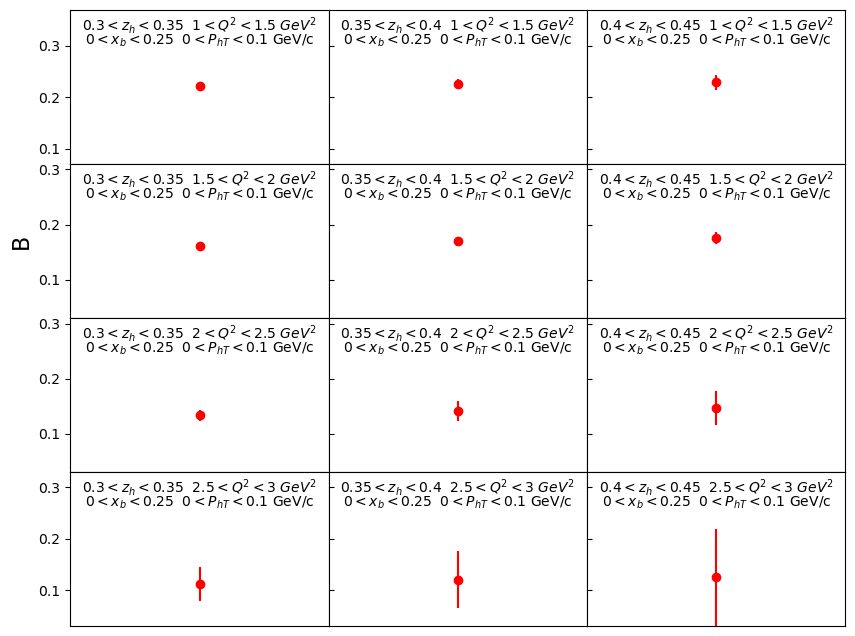

In [41]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Bmin1 = 0.07 ;Bmin2 = 0.03;Bmin3=0.03;Bmin4=0.03
Bmax1 = 0.37;Bmax2 = 0.31 ;Bmax3=0.31;Bmax4=0.33

axs[0][0].errorbar(-1,m_1_1.values[1],m_1_1.errors[1],fmt='or')
axs[0][0].set_ylim(Bmin1,Bmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(-1,m_1_2.values[1],m_1_2.errors[1],fmt='or')
axs[0][1].set_ylim(Bmin1,Bmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(-1,m_1_3.values[1],m_1_3.errors[1],fmt='or')
axs[0][2].set_ylim(Bmin1,Bmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(-1,m_2_1.values[1],m_2_1.errors[1],fmt='or')
axs[1][0].set_ylim(Bmin2,Bmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(-1,m_2_2.values[1],m_2_2.errors[1],fmt='or')
axs[1][1].set_ylim(Bmin2,Bmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(-1,m_2_3.values[1],m_2_3.errors[1],fmt='or')
axs[1][2].set_ylim(Bmin2,Bmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(-1,m_3_1.values[1],m_3_1.errors[1],fmt='or')
axs[2][0].set_ylim(Bmin3,Bmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(-1,m_3_2.values[1],m_3_2.errors[1],fmt='or')
axs[2][1].set_ylim(Bmin3,Bmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(-1,m_3_3.values[1],m_3_3.errors[1],fmt='or')
axs[2][2].set_ylim(Bmin3,Bmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(-1,m_4_1.values[1],m_4_1.errors[1],fmt='or')
axs[3][0].set_ylim(Bmin4,Bmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(-1,m_4_2.values[1],m_4_2.errors[1],fmt='or')
axs[3][1].set_ylim(Bmin4,Bmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(-1,m_4_3.values[1],m_4_3.errors[1],fmt='or')
axs[3][2].set_ylim(Bmin4,Bmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'B',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/2024_morephi/Bs_fit_moremorephi.pdf')

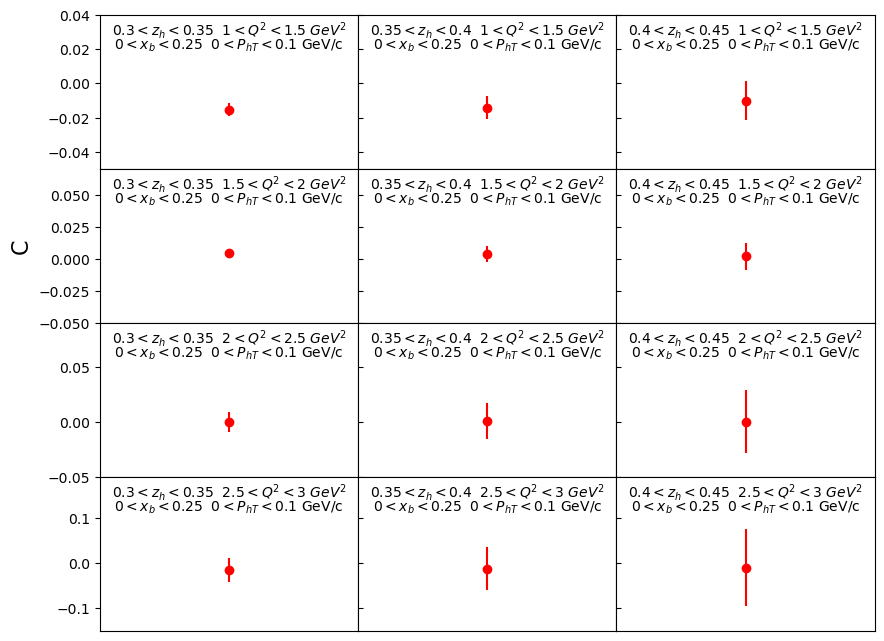

In [42]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

Cmin1 = -0.05 ;Cmin2 = -0.05;Cmin3=-0.05;Cmin4=-0.15
Cmax1 = 0.04;Cmax2 = 0.07 ;Cmax3=0.09;Cmax4=0.19

axs[0][0].errorbar(-1,m_1_1.values[2],m_1_1.errors[2],fmt='or')
axs[0][0].set_ylim(Cmin1,Cmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(-1,m_1_2.values[2],m_1_2.errors[2],fmt='or')
axs[0][1].set_ylim(Cmin1,Cmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(-1,m_1_3.values[2],m_1_3.errors[2],fmt='or')
axs[0][2].set_ylim(Cmin1,Cmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(-1,m_2_1.values[2],m_2_1.errors[2],fmt='or')
axs[1][0].set_ylim(Cmin2,Cmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(-1,m_2_2.values[2],m_2_2.errors[2],fmt='or')
axs[1][1].set_ylim(Cmin2,Cmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(-1,m_2_3.values[2],m_2_3.errors[2],fmt='or')
axs[1][2].set_ylim(Cmin2,Cmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(-1,m_3_1.values[2],m_3_1.errors[2],fmt='or')
axs[2][0].set_ylim(Cmin3,Cmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(-1,m_3_2.values[2],m_3_2.errors[2],fmt='or')
axs[2][1].set_ylim(Cmin3,Cmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(-1,m_3_3.values[2],m_3_3.errors[2],fmt='or')
axs[2][2].set_ylim(Cmin3,Cmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(-1,m_4_1.values[2],m_4_1.errors[2],fmt='or')
axs[3][0].set_ylim(Cmin4,Cmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(-1,m_4_2.values[2],m_4_2.errors[2],fmt='or')
axs[3][1].set_ylim(Cmin4,Cmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(-1,m_4_3.values[2],m_4_3.errors[2],fmt='or')
axs[3][2].set_ylim(Cmin4,Cmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'C',fontsize=16)


#plt.show()
plt.savefig('../Unpol_proposal/Materials/2024_morephi/Cs_fit_moremorephi.pdf')

NameError: name 'pim_m_1_1' is not defined

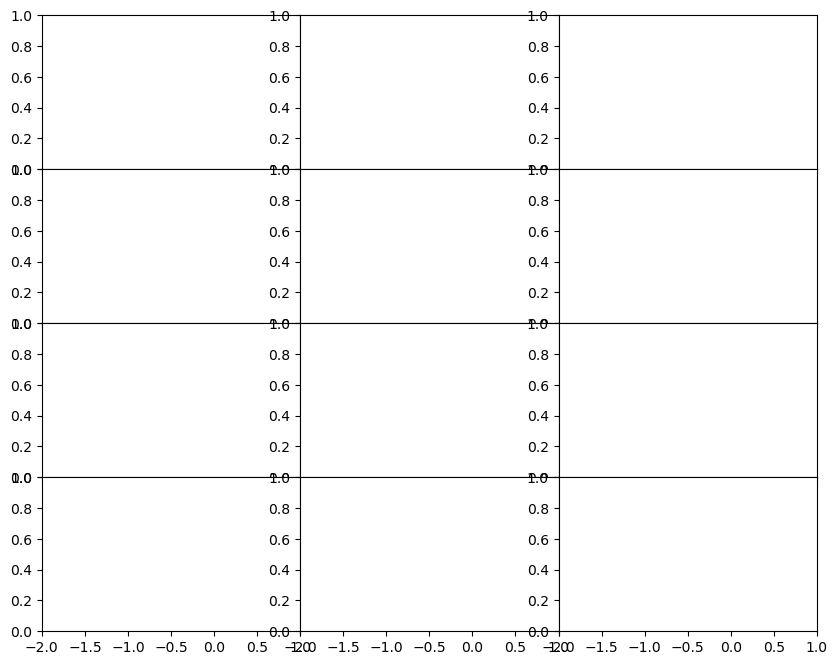

In [43]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
axs[0][0].set_xlim(-2,1)

Bmin1 = 0.27 ;Bmin2 = 0.23;Bmin3=0.13;Bmin4=-0.05
Bmax1 = 0.37;Bmax2 = 0.31 ;Bmax3=0.31;Bmax4=0.45

axs[0][0].errorbar(0,pim_m_1_1.values[1],pim_m_1_1.errors[1],fmt='ok')
axs[0][0].errorbar(-1,m_1_1.values[1],m_1_1.errors[1],fmt='or')
axs[0][0].set_ylim(Bmin1,Bmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(0,pim_m_1_2.values[1],pim_m_1_2.errors[1],fmt='ok')
axs[0][1].errorbar(-1,m_1_2.values[1],m_1_2.errors[1],fmt='or')
axs[0][1].set_ylim(Bmin1,Bmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(0,pim_m_1_3.values[1],pim_m_1_3.errors[1],fmt='ok')
axs[0][2].errorbar(-1,m_1_3.values[1],m_1_3.errors[1],fmt='or')
axs[0][2].set_ylim(Bmin1,Bmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(0,pim_m_2_1.values[1],pim_m_2_1.errors[1],fmt='ok')
axs[1][0].errorbar(-1,m_2_1.values[1],m_2_1.errors[1],fmt='or')
axs[1][0].set_ylim(Bmin2,Bmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(0,pim_m_2_2.values[1],pim_m_2_2.errors[1],fmt='ok')
axs[1][1].errorbar(-1,m_2_2.values[1],m_2_2.errors[1],fmt='or')
axs[1][1].set_ylim(Bmin2,Bmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(0,pim_m_2_3.values[1],pim_m_2_3.errors[1],fmt='ok')
axs[1][2].errorbar(-1,m_2_3.values[1],m_2_3.errors[1],fmt='or')
axs[1][2].set_ylim(Bmin2,Bmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(0,pim_m_3_1.values[1],pim_m_3_1.errors[1],fmt='ok')
axs[2][0].errorbar(-1,m_3_1.values[1],m_3_1.errors[1],fmt='or')
axs[2][0].set_ylim(Bmin3,Bmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(0,pim_m_3_2.values[1],pim_m_3_2.errors[1],fmt='ok')
axs[2][1].errorbar(-1,m_3_2.values[1],m_3_2.errors[1],fmt='or')
axs[2][1].set_ylim(Bmin3,Bmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(0,pim_m_3_3.values[1],pim_m_3_3.errors[1],fmt='ok')
axs[2][2].errorbar(-1,m_3_3.values[1],m_3_3.errors[1],fmt='or')
axs[2][2].set_ylim(Bmin3,Bmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(0,pim_m_4_1.values[1],pim_m_4_1.errors[1],fmt='ok')
axs[3][0].errorbar(-1,m_4_1.values[1],m_4_1.errors[1],fmt='or')
axs[3][0].set_ylim(Bmin4,Bmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(0,pim_m_4_2.values[1],pim_m_4_2.errors[1],fmt='ok')
axs[3][1].errorbar(-1,m_4_2.values[1],m_4_2.errors[1],fmt='or')
axs[3][1].set_ylim(Bmin4,Bmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(0,pim_m_4_3.values[1],pim_m_4_3.errors[1],fmt='ok')
axs[3][2].errorbar(-1,m_4_3.values[1],m_4_3.errors[1],fmt='or')
axs[3][2].set_ylim(Bmin4,Bmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'B',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')

In [ ]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
axs[0][0].set_xlim(-2,1)


Cmin1 = -0.05 ;Cmin2 = -0.05;Cmin3=-0.05;Cmin4=-0.15
Cmax1 = 0.04;Cmax2 = 0.07 ;Cmax3=0.09;Cmax4=0.19

axs[0][0].errorbar(0,pim_m_1_1.values[2],pim_m_1_1.errors[2],fmt='ok')
axs[0][0].errorbar(-1,m_1_1.values[2],m_1_1.errors[2],fmt='or')
axs[0][0].set_ylim(Cmin1,Cmax1)

axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)

axs[0][1].errorbar(0,pim_m_1_2.values[2],pim_m_1_2.errors[2],fmt='ok')
axs[0][1].errorbar(-1,m_1_2.values[2],m_1_2.errors[2],fmt='or')
axs[0][1].set_ylim(Cmin1,Cmax1)

axs[0][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)
axs[0][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][1].transAxes)

axs[0][2].errorbar(0,pim_m_1_3.values[2],pim_m_1_3.errors[2],fmt='ok')
axs[0][2].errorbar(-1,m_1_3.values[2],m_1_3.errors[2],fmt='or')
axs[0][2].set_ylim(Cmin1,Cmax1)

axs[0][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[0][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)
axs[0][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][2].transAxes)

axs[1][0].errorbar(0,pim_m_2_1.values[2],pim_m_2_1.errors[2],fmt='ok')
axs[1][0].errorbar(-1,m_2_1.values[2],m_2_1.errors[2],fmt='or')
axs[1][0].set_ylim(Cmin2,Cmax2)
#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[1][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)
axs[1][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][0].transAxes)

axs[1][1].errorbar(0,pim_m_2_2.values[2],pim_m_2_2.errors[2],fmt='ok')
axs[1][1].errorbar(-1,m_2_2.values[2],m_2_2.errors[2],fmt='or')
axs[1][1].set_ylim(Cmin2,Cmax2)

axs[1][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)
axs[1][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][1].transAxes)

axs[1][2].errorbar(0,pim_m_2_3.values[2],pim_m_2_3.errors[2],fmt='ok')
axs[1][2].errorbar(-1,m_2_3.values[2],m_2_3.errors[2],fmt='or')
axs[1][2].set_ylim(Cmin2,Cmax2)

axs[1][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[1][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[1],Q2_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)
axs[1][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[1][2].transAxes)

axs[2][0].errorbar(0,pim_m_3_1.values[2],pim_m_3_1.errors[2],fmt='ok')
axs[2][0].errorbar(-1,m_3_1.values[2],m_3_1.errors[2],fmt='or')
axs[2][0].set_ylim(Cmin3,Cmax3)

#axs[1][0].tick_params(direction='in',labelbottom=False,labelleft=False)
axs[2][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)
axs[2][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][0].transAxes)

axs[2][1].errorbar(0,pim_m_3_2.values[2],pim_m_3_2.errors[2],fmt='ok')
axs[2][1].errorbar(-1,m_3_2.values[2],m_3_2.errors[2],fmt='or')
axs[2][1].set_ylim(Cmin3,Cmax3)

axs[2][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)
axs[2][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][1].transAxes)

axs[2][2].errorbar(0,pim_m_3_3.values[2],pim_m_3_3.errors[2],fmt='ok')
axs[2][2].errorbar(-1,m_3_3.values[2],m_3_3.errors[2],fmt='or')
axs[2][2].set_ylim(Cmin3,Cmax3)

axs[2][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[2][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[2],Q2_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)
axs[2][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[2][2].transAxes)

axs[3][0].errorbar(0,pim_m_4_1.values[2],pim_m_4_1.errors[2],fmt='ok')
axs[3][0].errorbar(-1,m_4_1.values[2],m_4_1.errors[2],fmt='or')
axs[3][0].set_ylim(Cmin4,Cmax4)

axs[3][0].tick_params(axis='x',direction='in',bottom=False,labelbottom=False)
axs[3][0].text(0.5,0.9,r'${}<z_h<{}\ \  {}<Q^2<{}$ $GeV^2$'.format(z_cuts[0],z_cuts[1],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)
axs[3][0].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][0].transAxes)

axs[3][1].errorbar(0,pim_m_4_2.values[2],pim_m_4_2.errors[2],fmt='ok')
axs[3][1].errorbar(-1,m_4_2.values[2],m_4_2.errors[2],fmt='or')
axs[3][1].set_ylim(Cmin4,Cmax4)

axs[3][1].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[1],z_cuts[2],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)
axs[3][1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][1].transAxes)

axs[3][2].errorbar(0,pim_m_4_3.values[2],pim_m_4_3.errors[2],fmt='ok')
axs[3][2].errorbar(-1,m_4_3.values[2],m_4_3.errors[2],fmt='or')
axs[3][2].set_ylim(Cmin4,Cmax4)

axs[3][2].tick_params(direction='in',bottom=False,labelbottom=False,labelleft=False)
axs[3][2].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(z_cuts[2],z_cuts[3],Q2_cuts[3],Q2_cuts[4]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)
axs[3][2].text(0.5,0.8,r'${}<x_{{b}}<{}\ \  {}<P_{{hT}}<{}$ GeV/c'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[3][2].transAxes)

axs[1][0].set_ylabel(r'C',fontsize=16)


#plt.show()
#plt.savefig('../Unpol_proposal/Materials/results/Fuu_large_PT1_pip.pdf')